In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the Iris dataset
dataset = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t", quoting = 3)



In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

Model accuracy: 0.735


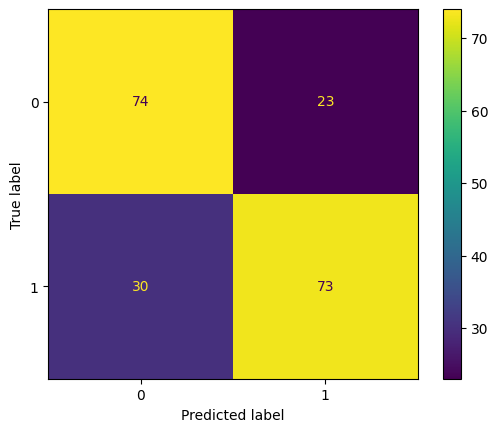

In [ ]:
# Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
#Create a CART template
tree_classifier = DecisionTreeClassifier(random_state=42)

#Train the model on the training data
tree_classifier.fit(X_train, y_train)

#Make predictions on test data
y_pred = tree_classifier.predict(X_test)

#Calculate the accuracy of the model<code>
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

#View the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=tree_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_classifier.classes_)
disp.plot()




In [ ]:
new_review = 'I hate this restaurant so much'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = tree_classifier.predict(new_X_test)
print(new_y_pred)

[0]
